## ДЗ блок СV1

Возьмите датасет https://www.kaggle.com/ajayrana/hymenoptera-data
Реализуйте сверточную нейронную сеть с использованием tf.keras или keras. 

Используйте сверточные, пуллинговые и полносвязанные слои. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Добавьте в предыдущую архитектуру слои BatchNorm. 

Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке


Создайте модель ResNet 50 (https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), инициализированную случайными весами, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке
Создайте модель ResNet 50, инициализированную весами ImageNet, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Результат пришлите в виде Jupyter Notebook на github’е или расшаренного Google Colab-блокнота

In [1]:
import cv2
import numpy as np
import tensorflow as tf

from imutils import paths

print(tf.__version__)
print(tf.executing_eagerly())

import os
from random import shuffle
from glob import glob

2.4.1
True


## Загружаем изображения

In [7]:

train = []
labels = []
 
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/ML/hymenoptera_data/train')))
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256)).flatten()
    train.append(image)
     label = imagePath.split(os.path.sep)[-2]
    labels.append(label) 

IMG_SIZE = (256, 256)

In [8]:
labels[120:125], train[120:125]


(['ants', 'ants', 'ants', 'bees', 'bees'],
 [array([32,  4, 58, ...,  1,  1,  3], dtype=uint8),
  array([  4,   4,   1, ..., 219, 214, 221], dtype=uint8),
  array([140, 214, 127, ..., 154, 202, 176], dtype=uint8),
  array([111,  78,   3, ..., 181, 178,   1], dtype=uint8),
  array([158, 123,   0, ..., 159, 107,   6], dtype=uint8)])

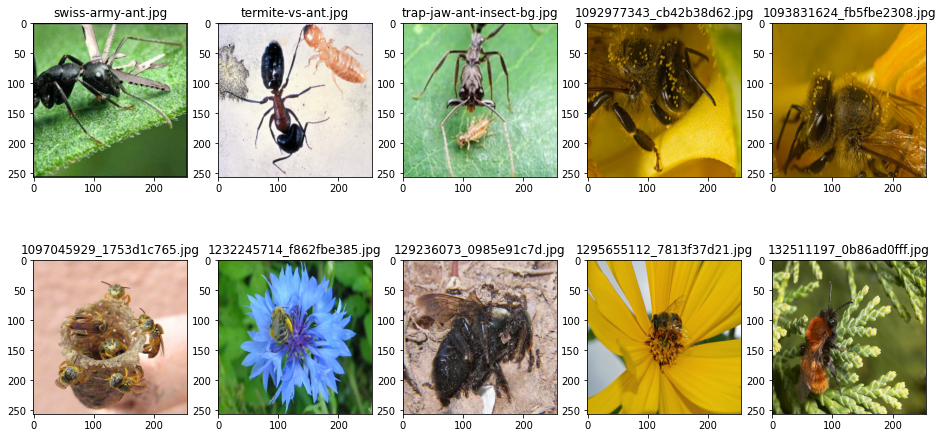

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(imagePaths[120:130], 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Добавим своих картинок для теста 

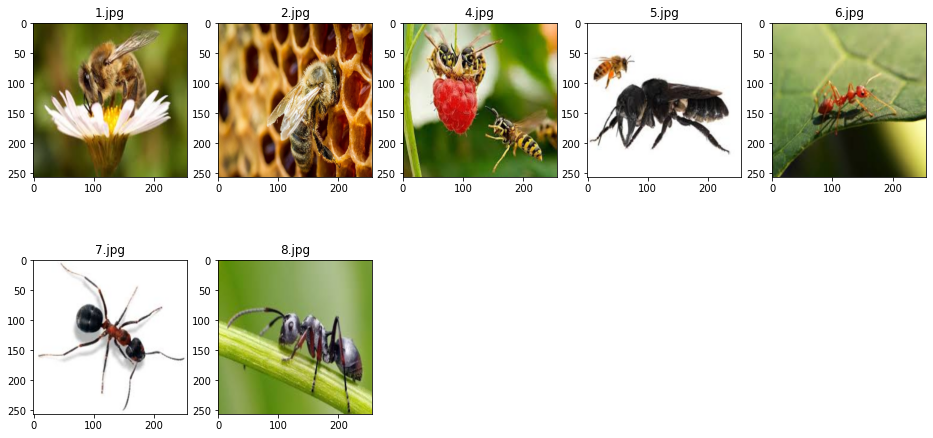

In [19]:
test_files = glob('/content/drive/MyDrive/ML/hymenoptera_data/test/*.jpg')
test_ds = []
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(test_files, 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    test_ds.append(img) 
    plt.imshow(img)

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/ML/hymenoptera_data/train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256))
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/ML/hymenoptera_data/val',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256))

Found 245 files belonging to 2 classes.
Found 153 files belonging to 2 classes.


In [17]:
for data,labels in validation_ds:
    #print(data.dtype)
    print('Data Shape')
    print(data.shape)
    #print(labels.dtype)
    print(labels.shape)
    print(labels)
    print(len(data))

Data Shape
(32, 256, 256, 3)
(32,)
tf.Tensor([1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1], shape=(32,), dtype=int32)
32
Data Shape
(32, 256, 256, 3)
(32,)
tf.Tensor([1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32
Data Shape
(32, 256, 256, 3)
(32,)
tf.Tensor([0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32
Data Shape
(32, 256, 256, 3)
(32,)
tf.Tensor([1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32
Data Shape
(25, 256, 256, 3)
(25,)
tf.Tensor([0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0], shape=(25,), dtype=int32)
25


## Создаем сверточную нейронную сеть:

 4 сверточных слоя, 2 пуллинговых, 1 полносвязный
 обучаем на 10 эпохах

In [23]:
input_img1 = tf.keras.layers.Input(shape=(256, 256, 3))

x1 = tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(input_img1)
x1 = tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(x1)
x1 = tf.keras.layers.MaxPooling2D((2, 2))(x1)

x1 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x1)
x1 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x1)
x1 = tf.keras.layers.MaxPooling2D((2, 2))(x1)

x1 = tf.keras.layers.Flatten()(x1)


x_class1 = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x1)

model1 = tf.keras.Model([input_img1], [x_class1])
model1.compile(optimizer='rmsprop', loss=['mse', 'binary_crossentropy'], metrics=['accuracy'])
model1.summary()
model1.fit(train_ds, epochs=10, validation_data=validation_ds)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 128)     3584      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0   

In [25]:
test_pred1 = model1.predict(predict_generator(test_files), steps=len(test_files))
test_pred1

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## Добавляем к сверточной сети слой нормализации
количество параметров сети увеличилось. Точность незначительно улучшилась.

In [107]:
input_img = tf.keras.layers.Input(shape=(256, 256, 3))

x = tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(input_img)
x = tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)

x_class = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model2 = tf.keras.Model([input_img], [x_class])
model2.compile(optimizer='rmsprop', loss=['mse', 'binary_crossentropy'], metrics=['accuracy'])

model2.summary()
model2.fit(train_ds, epochs=10, validation_data=validation_ds)

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 256, 256, 128)     3584      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 64)        0  

In [108]:
test_pred2 = model2.predict(predict_generator(test_files), steps=len(test_files))
test_pred2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

## Попробуем подобрать параметры

In [32]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(256, 256, 3)))  
model3.add(tf.keras.layers.Conv2D(32, 5, strides=2, activation="relu"))
model3.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model3.add(tf.keras.layers.MaxPooling2D(3))


model3.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model3.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model3.add(tf.keras.layers.MaxPooling2D(3))
model3.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model3.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model3.add(tf.keras.layers.MaxPooling2D(2))

model3.add(tf.keras.layers.GlobalMaxPooling2D())

model3.add(tf.keras.layers.Dense(1))
model3.summary()

model3.compile(optimizer='adam', loss=['binary_crossentropy'], metrics=['accuracy'])

model3.fit(train_ds, epochs=10, validation_data=validation_ds)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 32)      2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 39, 39, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 32)        9

In [33]:
test_pred3 = model3.predict(predict_generator(test_files), steps=len(test_files))
test_pred3


array([[0.1759304 ],
       [0.1686696 ],
       [0.18188769],
       [0.20447674],
       [0.12403814],
       [0.18543005],
       [0.14481701]], dtype=float32)

Все модели показывают плохой результат на 10 эпохах

## Созадаим сеть на основе Resnet50


In [102]:
base_model = tf.keras.applications.ResNet50( include_top=False, input_shape=(256, 256, 3),classes=1)
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-3].output

x = tf.keras.layers.Flatten(name="flatten")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=base_model.input, outputs=x)


In [96]:
model.summary()

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_31[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [103]:
model.compile(tf.keras.optimizers.Adam(lr=0.01), loss=['binary_crossentropy'], metrics=['Accuracy'])
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
8/8 [==============================] - 6s 411ms/step - loss: 507.3478 - accuracy: 0.3049 - val_loss: 0.6197 - val_accuracy: 0.0131
Epoch 2/10
8/8 [==============================] - 3s 305ms/step - loss: 0.7086 - accuracy: 0.0179 - val_loss: 0.5332 - val_accuracy: 0.0131
Epoch 3/10
8/8 [==============================] - 3s 301ms/step - loss: 0.5952 - accuracy: 0.0434 - val_loss: 0.4871 - val_accuracy: 0.0196
Epoch 4/10
8/8 [==============================] - 3s 309ms/step - loss: 0.5603 - accuracy: 0.0644 - val_loss: 0.5246 - val_accuracy: 0.0915
Epoch 5/10
8/8 [==============================] - 3s 312ms/step - loss: 0.5951 - accuracy: 0.0994 - val_loss: 0.4940 - val_accuracy: 0.0850
Epoch 6/10
8/8 [==============================] - 3s 311ms/step - loss: 0.5269 - accuracy: 0.1459 - val_loss: 0.7655 - val_accuracy: 0.2157
Epoch 7/10
8/8 [==============================] - 3s 313ms/step - loss: 0.5631 - accuracy: 0.1174 - val_loss: 0.5695 - val_accuracy: 0.2026
Epoch 8/10
8/8 [==

In [104]:
test_pred = model.predict(predict_generator(test_files), steps=len(test_files))
test_pred

array([[0.4143849],
       [0.4143849],
       [0.4143849],
       [0.4143849],
       [0.4143849],
       [0.4143849],
       [0.4143849]], dtype=float32)

Без инициализации весов сеть плохо обучается, добавим веса ImageNet

In [86]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3), classes=1)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-3))(x)

final_model =  tf.keras.Model(inputs = base_model.input, outputs=x)

final_model.compile(optimizer='rmsprop', loss=['binary_crossentropy'], metrics=['accuracy'])

#final_model.summary()

final_model.fit(train_ds, epochs=40, validation_data=validation_ds)

Epoch 1/40
8/8 [==============================] - 7s 416ms/step - loss: 0.7440 - accuracy: 0.6173 - val_loss: 0.6571 - val_accuracy: 0.7647
Epoch 2/40
8/8 [==============================] - 3s 310ms/step - loss: 0.2385 - accuracy: 0.9502 - val_loss: 0.6218 - val_accuracy: 0.7843
Epoch 3/40
8/8 [==============================] - 3s 309ms/step - loss: 0.1489 - accuracy: 1.0000 - val_loss: 0.5786 - val_accuracy: 0.8366
Epoch 4/40
8/8 [==============================] - 3s 311ms/step - loss: 0.1051 - accuracy: 1.0000 - val_loss: 0.5469 - val_accuracy: 0.8431
Epoch 5/40
8/8 [==============================] - 3s 313ms/step - loss: 0.0925 - accuracy: 1.0000 - val_loss: 0.5182 - val_accuracy: 0.8562
Epoch 6/40
8/8 [==============================] - 3s 310ms/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.4844 - val_accuracy: 0.8562
Epoch 7/40
8/8 [==============================] - 3s 307ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.8497
Epoch 8/40
8/8 [====

In [87]:
test_pred_final_model = final_model.predict(predict_generator(test_files), steps=len(test_files))
test_pred_final_model

array([[0.00541665],
       [0.0160904 ],
       [0.01088711],
       [0.00346282],
       [0.00933743],
       [0.00514715],
       [0.01592086]], dtype=float32)

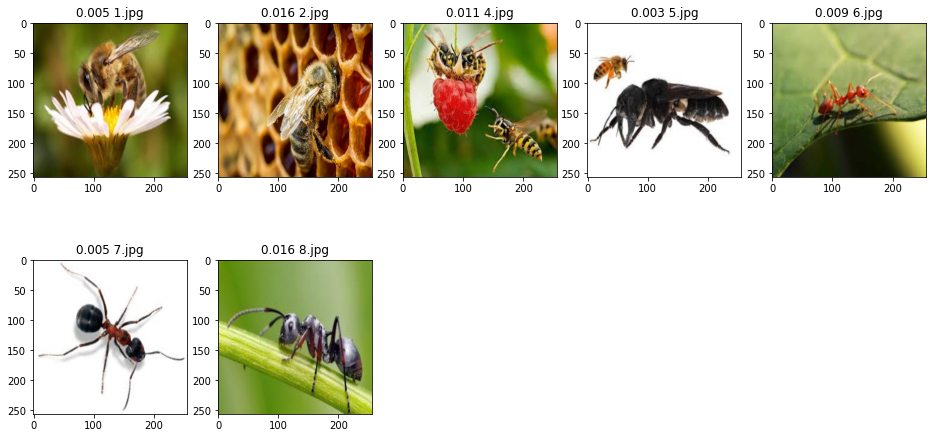

In [88]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files, test_pred_final_model), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.3f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

При увеличении эпох точность немного улучашется, но в целом не удается подобрать параметры для классификации. 